# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from scipy import stats
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load in the Dataset

In [2]:
tmdb = pd.read_csv('Data/2015-2019_tmdb_data.csv.gz')
tmdb.info()
tmdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21628 entries, 0 to 21627
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                21628 non-null  object 
 1   adult                  21628 non-null  float64
 2   backdrop_path          15757 non-null  object 
 3   belongs_to_collection  1324 non-null   object 
 4   budget                 21628 non-null  float64
 5   genres                 21628 non-null  object 
 6   homepage               5852 non-null   object 
 7   id                     21628 non-null  float64
 8   original_language      21628 non-null  object 
 9   original_title         21628 non-null  object 
 10  overview               21164 non-null  object 
 11  popularity             21628 non-null  float64
 12  poster_path            20849 non-null  object 
 13  production_companies   21628 non-null  object 
 14  production_countries   21628 non-null  object 
 15  re

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0369610,0.0,/aIGIYJTyOkEVUmEd3z5x6diYsFx.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397.0,en,Jurassic World,...,1.671537e+09,124.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,0.0,6.679,18891.0,PG-13
1,tt0420293,0.0,/b0p0OPx1ZDZVc8iDB1kle0Cc2H9.jpg,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}]",http://www.stanfordprisonexperimentfilm.com/,308032.0,en,The Stanford Prison Experiment,...,6.435570e+05,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They were given 2 weeks. It lasted 6 days.,The Stanford Prison Experiment,0.0,6.900,835.0,R
2,tt0462335,0.0,/wESuRMxELPAwo56qFRcoyI4p20F.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",http://www.highrisefilm.com,254302.0,en,High-Rise,...,3.464720e+05,119.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Leave the real world behind,High-Rise,0.0,5.700,1025.0,R
3,tt0478970,0.0,/a7sAqMKv5tkAdMzFfIhPqIBmQ9g.jpg,"{'id': 422834, 'name': 'Ant-Man Collection', '...",130000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/movies/movie/180/ant-man,102899.0,en,Ant-Man,...,5.193120e+08,117.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Heroes don't get any bigger.,Ant-Man,0.0,7.083,18094.0,PG-13
4,tt0787524,0.0,/cJ6dqrHhts085zJTMaXECjp0RfX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",http://www.ifcfilms.com/films/the-man-who-knew...,353326.0,en,The Man Who Knew Infinity,...,1.147245e+07,108.0,"[{'english_name': 'Sanskrit', 'iso_639_1': 'sa...",Released,What does it take to prove the impossible?,The Man Who Knew Infinity,0.0,7.184,1246.0,PG-13


One of the columns that will largely be used will be the 'certification' column. I want to check the value counts for the column to get the total number of certifications.

In [3]:
tmdb['certification'].value_counts()

R          1446
NR         1221
PG-13       858
PG          403
G           132
NC-17        47
Unrated       4
Name: certification, dtype: int64

In [4]:
# Combine 'NR' and 'Unrated' columns
tmdb['certification'] = tmdb['certification'].replace({'Unrated': 'NR'})
tmdb['certification'].value_counts()

R        1446
NR       1225
PG-13     858
PG        403
G         132
NC-17      47
Name: certification, dtype: int64

# Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

## State the Null and Alternative Hypothesis
- Null Hypothesis: There is no significant difference between MPAA ratings and amount of revenue generated of a movie.
- Alternative Hypothesis: There is a significant difference between the MPAA rating of a movie and the amount of revenue generated.


## Determining the Correct Test
- The data is numeric.
- There are 6 groups: MPAA ratings G, PG, PG-13, R, NR, NC-17
- Which test to perform? One-Way ANOVA


## Visualize and Separate Features for Hypothesis
- The target column is 'revenue'
- The column that determines the group is 'certification'

## Remove Columns with Null Certification Values

In [5]:
cert = tmdb.copy()
cert.dropna(subset=['certification'], inplace=True)
cert.isna().sum()

imdb_id                     0
adult                       0
backdrop_path             599
belongs_to_collection    3628
budget                      0
genres                      0
homepage                 2141
id                          0
original_language           0
original_title              0
overview                   11
popularity                  0
poster_path                62
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                  1409
title                       0
video                       0
vote_average                0
vote_count                  0
certification               0
dtype: int64

Now that the dataset has been filtered for movies that have certification, I can now compare the 4 groups for revenue amounts.

## Separating the Groups

Each group will need to be separated in order to be analyzed

In [7]:
groups = {}
## Loop through all unique categories
for i in cert['certification'].unique():
    ## Get series for group and rename
    data = cert.loc[cert['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'R', 'NR', 'PG', 'G', 'NC-17'])

## Test for Normality

In [8]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG-13,858.0,1.297074e-197,906.698304
R,1446.0,0.000000e+00,1881.210106
NR,1225.0,0.000000e+00,2160.558226
PG,403.0,1.476717e-79,363.028801
G,132.0,3.814987e-55,250.606486
NC-17,47.0,5.301539e-23,102.582920


In [9]:
# checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG-13,858.0,1.297074e-197,906.698304,True
R,1446.0,0.000000e+00,1881.210106,True
NR,1225.0,0.000000e+00,2160.558226,True
PG,403.0,1.476717e-79,363.028801,True
G,132.0,3.814987e-55,250.606486,True
NC-17,47.0,5.301539e-23,102.582920,True


Each group has over 20 samples, so the test for normality can be passed.

## Test for Equal Variance

In [10]:
stats.levene(*groups.values())

LeveneResult(statistic=47.39937363782326, pvalue=8.390754236016758e-48)

Because p < 0.05, the test did meet the assumption for equal variance. An alternate test will need to be used for final ANOVA hypothesis test.

## Final Hypothesis Test

In [11]:
# using alternate test, ''
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=580.8012479161063, pvalue=2.8425813727998375e-123)

The p-value is significantly less than alpha (0.05), but with 6 different groups, it's hard to know which ones, or all, are less than alpha. I now need to use Tukey's Pairwise Multiple Comparisons Test in order to find which ones are significantly less.

### Tukey's Pairwise Multiple Comparisons Test

In [12]:
# save the values as revenue and the labels to the certification
values = cert['revenue']
labels = cert['certification']

In [13]:
# perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-16700303.3272,0.9822,-84890435.6619,51489829.0075,False
G,NR,-15275837.2685,0.8446,-52051950.3573,21500275.8203,False
G,PG,63373985.3984,0.0001,23114491.1653,103633479.6315,True
G,PG-13,67562578.9557,0.0,30029179.5665,105095978.3449,True
G,R,3302334.1328,0.9998,-33199383.3748,39804051.6405,False
NC-17,NR,1424466.0587,1.0,-58245734.105,61094666.2224,False
NC-17,PG,80074288.7256,0.0031,18196367.2224,141952210.2289,True
NC-17,PG-13,84262882.2829,0.0009,24122992.3315,144402772.2343,True
NC-17,R,20002637.4601,0.9309,-39498838.7793,79504113.6994,False
NR,PG,78649822.6669,0.0,55596286.8067,101703358.5271,True


From the summary above, there are more certifications that are significantly different than those that are not.

- G is significantly different than PG and PG-13
- PG is significantly different than G, NC-17, NR, and R
- PG-13 is significantly different than G, PG, R, NR, and NC-17
- R is significantly different than PG, PG-13, and NR
- NR is significantly different than PG, PG-13, and R
- NC-17 is significantly different than PG and PG-13

## Visualizing Groups and Revenue

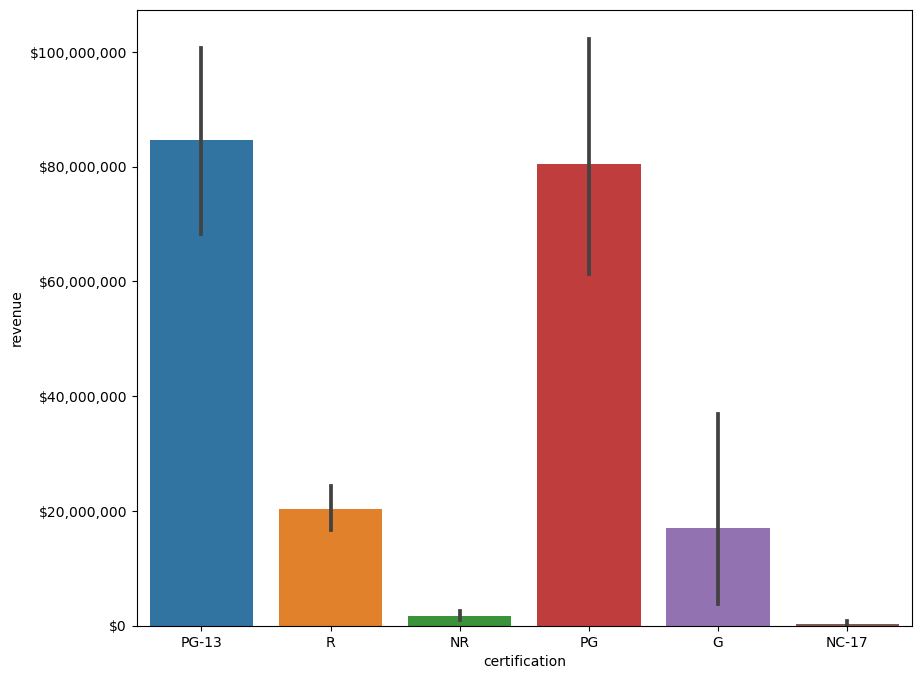

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=cert, x='certification',y='revenue');

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)

## Final Conclusion

Based on the p-values that are lower than alpha, PG and PG-13 movies are the most significantly different from all movie certifications, and on average, generate the most revenue out of all 6 certifications.

# Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

## State the Null and Alternative Hypothesis
- Null Hypothesis: There is no significant difference in revenue between movies that are over 2.5 hours long and movies that are less than 1.5 hours.
- Alternative Hypothesis: There is a significant difference in revenue between movies that are over 2.5 hours long and movies that are less than 1.5 hours.


## Determining the Correct Test
- The data is numeric.
- There are 2 groups: Movies < 1.5 hours long and movies > 2.5 hours
- Which test to perform? 2 sample T-Test


## Visualize and Separate Features for Hypothesis
- The target column is 'revenue'
- The column that determines the group is 'runtime'

## Filter for Movie Runtimes

In [18]:
short_df = tmdb.loc[tmdb['runtime']>=90].copy()
long_df = tmdb.loc[tmdb['runtime']<=150].copy()

In [19]:
# define features of interest
short = short_df['revenue']
long = long_df['revenue']

## Check for and Remove Outliers

In [21]:
# Check for outliers in revenue for runtime
short_outliers = np.abs(stats.zscore(short)) > 3
short_outliers.sum()
print(f'There are {short_outliers.sum()} outliers in the short runtime group out of {len(short)}.')

There are 153 outliers in the short runtime group out of 13598.


In [22]:
# remove the outliers
short = short.loc[~short_outliers]
short

1          643557.0
2          346472.0
4        11472454.0
5         3460466.0
6        64191523.0
            ...    
21620           0.0
21622           0.0
21623           0.0
21624           0.0
21627           0.0
Name: revenue, Length: 13445, dtype: float64

In [23]:
# Check for outliers in revenue for runtime
long_outliers = np.abs(stats.zscore(long)) > 3
long_outliers.sum()
print(f'There are {long_outliers.sum()} outliers in the long runtime group out of {len(long)}.')

There are 192 outliers in the long runtime group out of 21210.


In [24]:
# remove the outliers
long = long.loc[~long_outliers]
long

1          643557.0
2          346472.0
4        11472454.0
5         3460466.0
6        64191523.0
            ...    
21623           0.0
21624           0.0
21625           0.0
21626           0.0
21627           0.0
Name: revenue, Length: 21018, dtype: float64

In [26]:
# checking for outlier removal from short runtime
len(short_df), len(short)

(13598, 13445)

In [27]:
# checking for outlier removal from long runtime
len(long_df), len(long)

(21210, 21018)

The outliers have been successfully removed.

## Normality Test

Since the length for each group satisfies the need for at least 20 samples, I can pass the test for Normality, even if the data is not distributed normally. There is no need to perform this test because of this and I will now move on to test for equal variance between the groups.

## Test for Assumption of Equal Variances

In [28]:
# Use Levene's test for equal variance
result = stats.levene(short, long)
print(result)

LeveneResult(statistic=89.71518227951432, pvalue=2.91921800169522e-21)


In [29]:
# Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


Because the groups do not have equal variance, I will need to use 'equal_var=False when running the final hypothesis test.

In [30]:
## run final hypothess test
result = stats.ttest_ind(short, long, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=8.671895516733509, pvalue=4.555940312126729e-18)


True

In [31]:
# showing the mean for each group
print(f'The mean revenue of short runtime is {short.mean().round(2)}')
print(f'The mean revenue of long runtime is {long.mean().round(2)}')

The mean revenue of short runtime is 3792534.37
The mean revenue of long runtime is 2061379.1


## Final Conclusion

The p-value < 0.05, so therefore I reject the null hypothesis and support the alternative hypothesis that there is a significant difference in revenue between movies that are shorter than 1.5 hours and longer than 2.5 hours. The mean revenue for movies shorter than 1.5 hours is much higher at 3.8 million dollars than movies longer than 2.5 hours at 2.06 million dollars.